In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

In [4]:
df = pd.read_csv('/content/drive/MyDrive/NLP/spam.tsv', sep='\t')
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [6]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [9]:
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

Since there is an uneven distribution here, it may affect the success of our model

In [12]:
df['label'].value_counts() / len(df)

label
ham     0.865937
spam    0.134063
Name: count, dtype: float64

In [13]:
ham = df[df['label'] == 'ham']
spam = df[df['label'] == 'spam']

In [14]:
ham.shape, spam.shape

((4825, 4), (747, 4))

In [15]:
ham = ham.sample(spam.shape[0])

In [17]:
ham.shape, spam.shape

((747, 4), (747, 4))

In [22]:
data = pd.concat([ham, spam], ignore_index=True)

In [23]:
data.shape

(1494, 4)

In [30]:
max(data[data['label'] == 'spam'] ['length']), min(data[data['label'] == 'spam'] ['length'])

(223, 13)

In [31]:
max(data[data['label'] == 'ham'] ['length']), min(data[data['label'] == 'ham'] ['length'])

(444, 3)

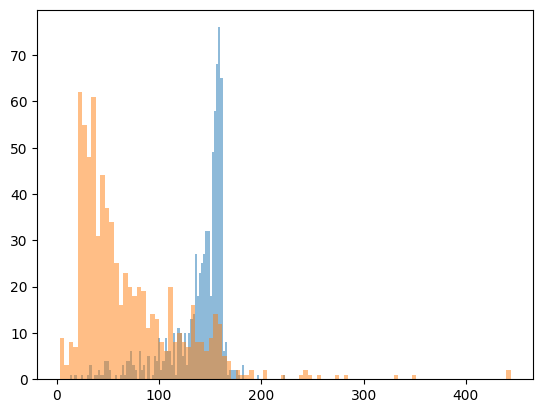

In [27]:
plt.hist(data[data['label'] == 'spam'] ['length'], bins=100, alpha=0.5)
plt.hist(data[data['label'] == 'ham'] ['length'], bins=100, alpha=0.5)
plt.show()

In [34]:
X_train , X_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size=0.25, random_state=12, shuffle=True)

In [40]:
classifier = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('classifier', RandomForestClassifier(n_estimators=100))
])

In [41]:
classifier.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

In [42]:
preds = classifier.predict(X_test)

In [44]:
conf_matrix = confusion_matrix(y_test, preds)
print('Model Confusion Matrix \n', conf_matrix)

Model Confusion Matrix 
 [[184   1]
 [ 11 178]]


In [45]:
acc = accuracy_score(y_test, preds)
print('Model Accuracy: ', acc)

Model Accuracy:  0.9679144385026738


In [46]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

         ham       0.94      0.99      0.97       185
        spam       0.99      0.94      0.97       189

    accuracy                           0.97       374
   macro avg       0.97      0.97      0.97       374
weighted avg       0.97      0.97      0.97       374



In [47]:
test1 = ['Hello, You are learning natural Language Processing']
test2 = ['Hope you are doing good and learning new things !']
test3 = ['Congratulations, You won a lottery ticket worth $1 Million ! To claim call on 446677']

In [48]:
print(classifier.predict(test1))
print(classifier.predict(test2))
print(classifier.predict(test3))

['ham']
['ham']
['spam']


In [49]:
test4 = ['Thank you for your recent purchase from our store! We hope you are enjoying your new product. If you have any questions or need further assistance, feel free to contact our customer service team.']
test5 = ['We noticed some suspicious activity in your account. To ensure your accounts security, please verify your details by clicking the link below.']

In [50]:
print(classifier.predict(test4))
print(classifier.predict(test5))

['spam']
['ham']
